In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

random_state = 42

In [2]:
data = pd.read_csv('./exam_2021_01_15.csv')
data.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


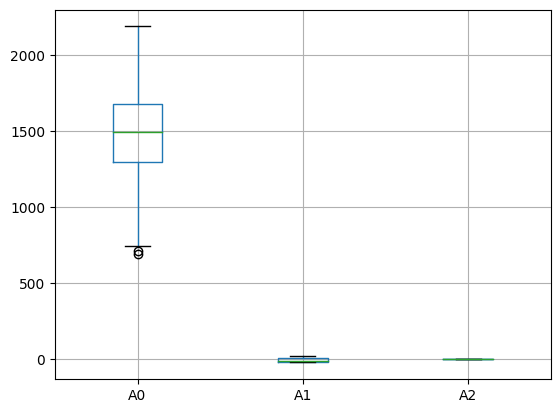

In [9]:
data['y'] = data['y'].astype(str)
data.boxplot();

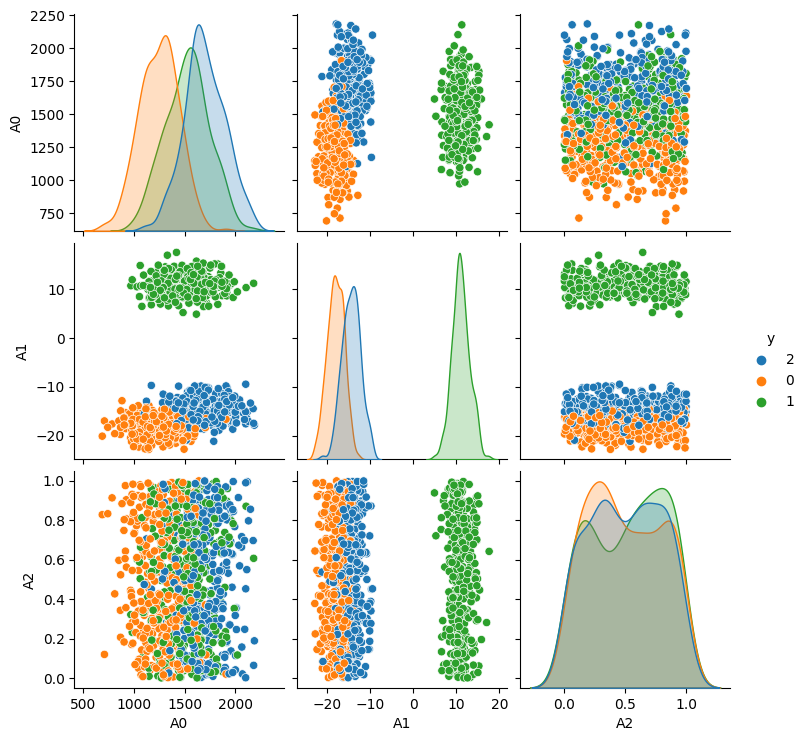

In [10]:
sns.pairplot(data, hue='y');

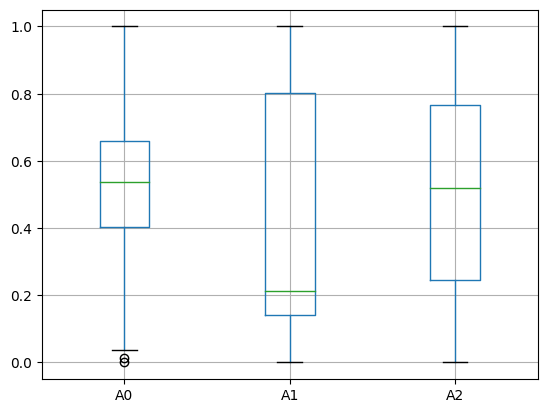

In [18]:
data[['A0', 'A1', 'A2']] = MinMaxScaler().fit_transform(data[['A0', 'A1', 'A2']])
data.boxplot();

In [31]:
X = data.drop(['y', 'A2'], axis=1)
y = data['y']

In [32]:
parameters = list(ParameterGrid([{'n_clusters': range(2,7)}]))

inertia_values = []
silhouette_values = []

for i in range(len(parameters)):
    k_means = KMeans(**(parameters[i]), random_state=random_state)
    y_k_means = k_means.fit_predict(X)
    inertia_values.append(k_means.inertia_)
    silhouette_values.append(silhouette_score(X, y_k_means))

In [37]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):

	fig, ax1 = plt.subplots()
	
	color = 'tab:red'
	ax1.set_xlabel(xlabel)
	ax1.set_ylabel(y1label, color=color)
	ax1.plot(x, y1, color=color)
	ax1.tick_params(axis='y', labelcolor=color)
	
	ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
	color = 'tab:blue'
	ax2.set_ylabel(y2label, color=color) # we already handled the x-label with ax1
	ax2.plot(x, y2, color=color)
	ax2.tick_params(axis='y', labelcolor=color)
	ax2.set_ylim(0,1) # the axis for silhouette is [0,1]
	fig.tight_layout() # otherwise the right y-label is slightly clipped
	
	plt.show()

def transform(y_true, y_pred):
	y_mapped = y_pred.copy()
	for lab in np.unique(y_pred):
		if y_true.str.contains(lab).any():
			true_l, count = np.unique(y_true[y_pred==lab], return_counts=True)
			y_mapped[y_pred==lab] = true_l[np.argmax(count)]
		else:
			y_mapped[y_pred==lab] = lab
	return y_mapped

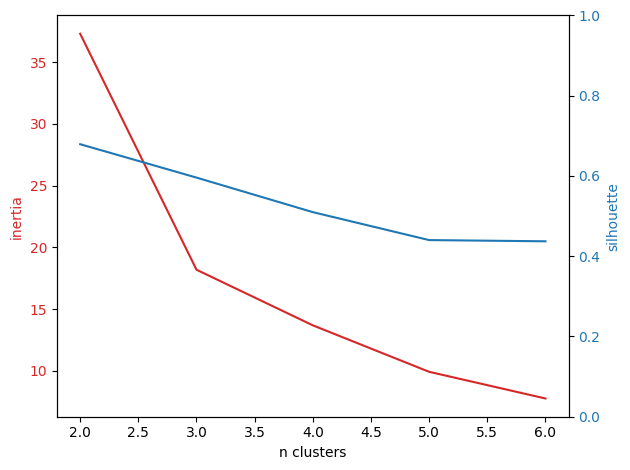

In [33]:
two_plots(range(2, 7), inertia_values, silhouette_values, 'n clusters', 'inertia', 'silhouette')

In [35]:
k_means = KMeans(n_clusters=3, random_state=random_state)
y_k_means = k_means.fit_predict(X)
pair_confusion_matrix(y, y_k_means)

array([[624856,  41810],
       [ 41770, 290564]])

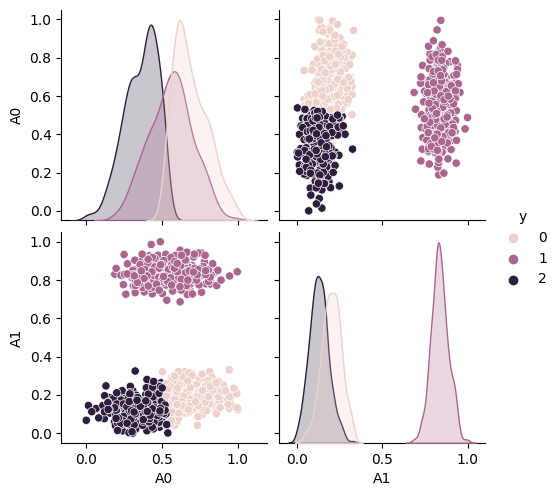

In [36]:
clustering_plot = X.copy()
clustering_plot['y'] = y_k_means
sns.pairplot(clustering_plot, hue='y');

In [42]:
print(f'the accuracy against the golden standars is: {round(accuracy_score(y, transform(y, y_k_means.astype(str))), 2) * 100}%')

the accuracy against the golden standars is: 93.0%


In [56]:
parameters = list(ParameterGrid([{'n_components':range(2,8)}]))

silhouette_values = []
N = len(y)

for i in range(len(parameters)):
    gaussian_mixture = GaussianMixture(**(parameters[i]), random_state=random_state)
    y_gaussian_mixture = gaussian_mixture.fit_predict(X)
    n_clusters = len(np.unique(y_gaussian_mixture))
    if n_clusters > 1:
        silhouette_values.append(silhouette_score(X, y_gaussian_mixture))

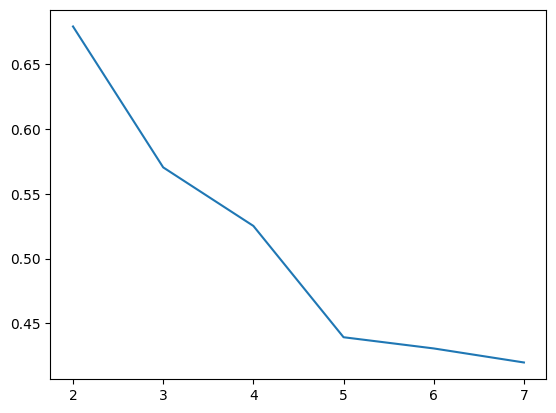

In [57]:
plt.plot(range(2, 8), silhouette_values);

In [58]:
gaussian_mixture = GaussianMixture(n_components=3, random_state=random_state)
y_gaussian_mixture = gaussian_mixture.fit_predict(X)
pair_confusion_matrix(y, y_gaussian_mixture)

array([[641544,  25122],
       [ 25038, 307296]])

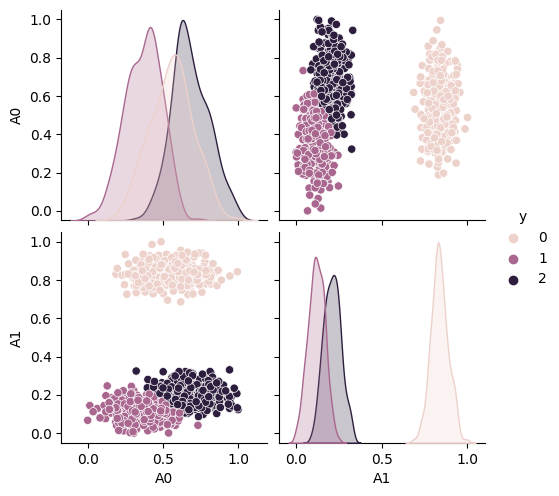

In [59]:
clustering_plot['y'] = y_gaussian_mixture
sns.pairplot(clustering_plot, hue='y');

In [61]:
print(f'the accuracy against the golden standars is: {round(accuracy_score(y, transform(y, y_gaussian_mixture.astype(str))), 2) * 100}%')

the accuracy against the golden standars is: 96.0%
